In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
lyft_df = pd.read_csv('Data_files/lyft.csv')
rideshare_df = pd.read_csv('Data_files/rideshare_data.csv')
uber_df = pd.read_csv('Data_files/uber.csv')


In [ ]:
rideshare_df

In [ ]:
#Spencer's code 
grouped_destination = rideshare_df.groupby(['destination'])
dest_count = grouped_destination.count()
dest_count['id'].plot(kind = 'bar', alpha = 0.75, align = 'center', color = 'r')
plt.xlabel('Drop off Point')
plt.ylabel('Number of Rides')
plt.title('Number of Rides to Different Areas of Boston')
plt.tight_layout()


In [ ]:
lyft_count = lyft_df.groupby(['destination']).count()
uber_count = uber_df.groupby(['destination']).count()
merge_count = pd.DataFrame({'Uber':uber_count['id'], 'Lyft':lyft_count['id']})
merge_count.plot(kind='bar', stacked =True, color = ['r','b'])
plt.xlabel('Drop off point')
plt.ylabel('Number of Rides')
plt.title('Stacked Bar Chart of the Number of rides to each Drop off point for Lyft and Uber')
plt.tight_layout()

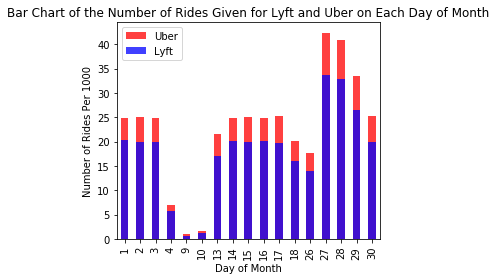

In [8]:
#Adam's code

#separating lyft and uber
uber_values = rideshare_df['cab_type'] == 'Uber'
uber_days = rideshare_df[uber_values]
lyft_values = rideshare_df['cab_type'] == 'Lyft'
lyft_days = rideshare_df[lyft_values]

#grouping uber by day and plotting
uber_days_grouped = uber_days.groupby(['day'])
uber_day_count = uber_days_grouped.count() / 1000
uber_day_count['id'].plot(kind = 'bar', alpha = 0.75, align = 'center', color = 'r')

#grouping lyft by day and plotting
lyft_days_grouped = lyft_days.groupby(['day'])
lyft_day_count = lyft_days_grouped.count() / 1000
lyft_day_count['id'].plot(kind = 'bar', alpha = 0.75, align = 'center', color = 'b')

#labeling graph
plt.xlabel('Day of Month')
plt.ylabel('Number of Rides Per 1000')
plt.title('Bar Chart of the Number of Rides Given for Lyft and Uber on Each Day of Month')
plt.tight_layout()
plt.legend(['Uber', 'Lyft'])


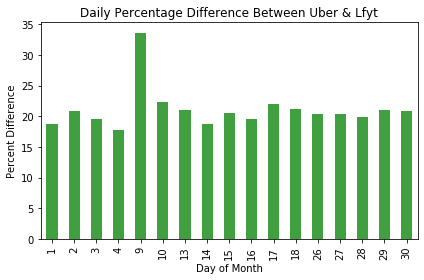

In [6]:
ride_split = (uber_day_count - lyft_day_count) / uber_day_count * 100
ride_split['id'].plot(kind = 'bar', alpha = 0.75, align = 'center', color = 'g')

plt.xlabel('Day of Month')
plt.ylabel('Percent Difference')
plt.title('Daily Percentage Difference Between Uber & Lfyt')
plt.tight_layout()

In [ ]:
#Rory's code
